# **1. Money Change**

As we already know, a natural greedy strategy for the change problem does not work correctly for any set of denominations. For example, if the available denominations are 1, 3, and 4, the greedy algorithm will change 6 cents using three coins (4 + 1 + 1) while it can be changed using just two coins (3 + 3). Your goal now is to apply dynamic programming for solving the Money Change Problem for denominations 1, 3, and 4.

**Problem Description**

Input Format: Integer money.

Output Format: The minimum number of coins with denominations 1, 3, 4 that changes money.

Constraints: $1 \leq money \leq 10^{3}$

In [ ]:
# Uses python3
import math

money = int(input())
denominations = [1, 3, 4]
minCoins = [0] + [math.inf]*money

for i in range(1, money+1):
    for j in denominations:
        if i>=j:
            coins = minCoins[i-j]+1
            if coins < minCoins[i]:
                minCoins[i] = coins

print(minCoins[money])

5
2


# **2. Primitive Calculator**

You are given a primitive calculator that can perform the following three operations with the current number 𝑥: multiply 𝑥 by 2, multiply 𝑥 by 3, or add 1 to 𝑥. Your goal is given a positive integer 𝑛, find the minimum number of operations needed to obtain the number 𝑛 starting from the number 1.

**Problem Description**

Task: Given an integer 𝑛, compute the minimum number of operations needed to obtain the number 𝑛 starting from the number 1.

Input Format. The input consists of a single integer $1 \leq n \leq 10^{6}$

Output Format. In the first line, output the minimum number 𝑘 of operations needed to get 𝑛 from 1. In the second line output a sequence of intermediate numbers. That is, the second line should contain positive integers 𝑎0, 𝑎2, . . . , 𝑎𝑘−1 such that 𝑎0 = 1, 𝑎𝑘−1 = 𝑛 and for all 0 ≤ 𝑖 < 𝑘 − 1, 𝑎𝑖+1 is equal to either 𝑎𝑖 + 1, 2𝑎𝑖, or 3𝑎𝑖. If there are many such sequences, output any one of them.

In [ ]:
# Uses python3

import math

n = int(input())

num_operations = [0, 0] + [math.inf]*(n-1)

for i in range(2, n+1):
    temp1, temp2, temp3 = [math.inf]*3

    temp1 = num_operations[i-1] + 1 
    if i%2 == 0: temp2 = num_operations[i//2] + 1
    if i%3 == 0: temp3 = num_operations[i//3] + 1
    min_ops = min(temp1, temp2, temp3)
    num_operations[i] = min_ops

print(num_operations[n])


nums = [n]
while n!=1:
    if n%3 ==0 and num_operations[n]-1 == num_operations[n//3]:
        nums += [n//3]
        n = n//3
    elif n%2 ==0 and num_operations[n]-1 == num_operations[n//2]:
        nums += [n//2]
        n = n//2
    else:
        nums += [n-1]
        n = n - 1

print(*nums[::-1])

5
3
1 2 4 5


# **3. Edit Distance**

The edit distance between two strings is the minimum number of operations  (insertions, deletions, and substitutions of symbols) to transform one string into another. It is a measure of similarity of two strings.
Edit distance has applications, for example, in computational biology, natural language processing, and spell
checking. Your goal in this problem is to compute the edit distance between two strings.

**Problem Description**

Task: The goal of this problem is to implement the algorithm for computing the edit distance between two
strings.

Input Format: Each of the two lines of the input contains a string consisting of lower case latin letters.

Constraints: The length of both strings is at least 1 and at most 100.

Output Format: Output the edit distance between the given two strings.

In [ ]:
# Uses python3
import numpy

def EditDistance(s1, s2):
    ln_s1 = len(s1)
    ln_s2 = len(s2)

    Matrix = numpy.zeros((ln_s1+1 , ln_s2+1))
    for i in range(ln_s2+1):
        Matrix[0][i] = i

    for i in range(ln_s1+1):
        Matrix[i][0] = i

    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = Matrix[i][j-1]   + 1
            deletion  = Matrix[i-1][j]   + 1
            mismatch  = Matrix[i-1][j-1] + 1
            match     = Matrix[i-1][j-1]
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, mismatch)
    
    return (int(Matrix[ln_s1][ln_s2]))


s1, s2 = input(), input()
edit_distance = EditDistance(s1, s2)

print(edit_distance)

short
ports
3


# **4. Longest Common Subsequence of Two Sequences**

Compute the length of a longest common subsequence of two sequences.

**Problem Description**

Task. Given two sequences 𝐴 = (𝑎1, 𝑎2, . . . , 𝑎𝑛) and 𝐵 = (𝑏1, 𝑏2, . . . , 𝑏𝑚), find the length of their longest common subsequence, i.e., the largest non-negative integer 𝑝 such that there exist indices 1 ≤ 𝑖1 < 𝑖2 < · · · < 𝑖𝑝 ≤ 𝑛 and 1 ≤ 𝑗1 < 𝑗2 < · · · < 𝑗𝑝 ≤ 𝑚, such that 𝑎𝑖1 = 𝑏𝑗1, . . . , 𝑎𝑖𝑝 = 𝑏𝑗𝑝.

Input Format: First line: 𝑛. Second line: 𝑎1, 𝑎2, . . . , 𝑎𝑛. Third line: 𝑚. Fourth line: 𝑏1, 𝑏2, . . . , 𝑏𝑚.

Constraints: 1 ≤ 𝑛, 𝑚 ≤ 100; $-10^{9} < 𝑎𝑖, 𝑏𝑖  < 10^{9}$.

Output Format. Output 𝑝.


In [ ]:
# Uses python3
import numpy

def LCS2(s1, s2, n1, n2):

    Matrix = numpy.zeros((n1+1 , n2+1))

    for i in range(1, n1+1):
        for j in range(1, n2+1):
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = Matrix[i-1][j-1] + 1
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = max(Matrix[i][j-1], Matrix[i-1][j])
    
    return (int(Matrix[n1][n2]))

n1 = int(input())
s1 = list(map(int, input().split()))
n2 = int(input())
s2 = list(map(int, input().split()))
LCS_length = LCS2(s1, s2, n1, n2)
print(LCS_length)

3
2 7 5
2
2 5
2


# **5. Longest Common Subsequence of Three Sequences**
Compute the length of a longest common subsequence of three sequences.

**Problem Description**

Task. Given three sequences 𝐴 = (𝑎1, 𝑎2, . . . , 𝑎𝑛), 𝐵 = (𝑏1, 𝑏2, . . . , 𝑏𝑚), and 𝐶 = (𝑐1, 𝑐2, . . . , 𝑐𝑙), find the length of their longest common subsequence, i.e., the largest non-negative integer 𝑝 such that there exist indices 1 ≤ 𝑖1 < 𝑖2 < · · · < 𝑖𝑝 ≤ 𝑛, 1 ≤ 𝑗1 < 𝑗2 < · · · < 𝑗𝑝 ≤ 𝑚, 1 ≤ 𝑘1 < 𝑘2 < · · · < 𝑘𝑝 ≤ 𝑙 such that 𝑎𝑖1 = 𝑏𝑗1 = 𝑐𝑘1, . . . , 𝑎𝑖𝑝 = 𝑏𝑗𝑝 = 𝑐𝑘𝑝

Input Format: First line: 𝑛. Second line: 𝑎1, 𝑎2, . . . , 𝑎𝑛. Third line: 𝑚. Fourth line: 𝑏1, 𝑏2, . . . , 𝑏𝑚. Fifth line:
𝑙. Sixth line: 𝑐1, 𝑐2, . . . , 𝑐𝑙.

Constraints: 1 ≤ 𝑛, 𝑚, 𝑙 ≤ 100; $-10^{9} < 𝑎𝑖, 𝑏𝑖, 𝑐𝑖  < 10^{9}$.

Output Format. Output 𝑝.

In [ ]:
# Uses python3
import numpy
                                    
def LCS3(s1, s2, s3, n1, n2, n3):

    Matrix = numpy.zeros((n1+1 , n2+1, n3+1))

    for i in range(1, n1+1):
        for j in range(1, n2+1):
            for k in range(1, n3+1):
                if s1[i-1] == s2[j-1] == s3[k-1]:
                    Matrix[i][j][k] = Matrix[i-1][j-1][k-1] + 1
                else:
                    Matrix[i][j][k] = max(Matrix[i-1][j][k], Matrix[i][j-1][k], Matrix[i][j][k-1])
    
    return (int(Matrix[-1][-1][-1]))

n1 = int(input())
s1 = list(map(int, input().split()))
n2 = int(input())
s2 = list(map(int, input().split()))
n3 = int(input())
s3 = list(map(int, input().split()))

LCS_length = LCS3(s1, s2, s3, n1, n2, n3)
print(LCS_length)

3
1 2 3
3
2 1 3
3
1 3 5
2


**Captura de Pantalla Coursera**
![Semana 5 Dynamic Programming 1.png](https://raw.githubusercontent.com/bdleons/AlgorithmsUN2021II/main/lab15/Semana%205%20Dynamic%20Programming%201.png)
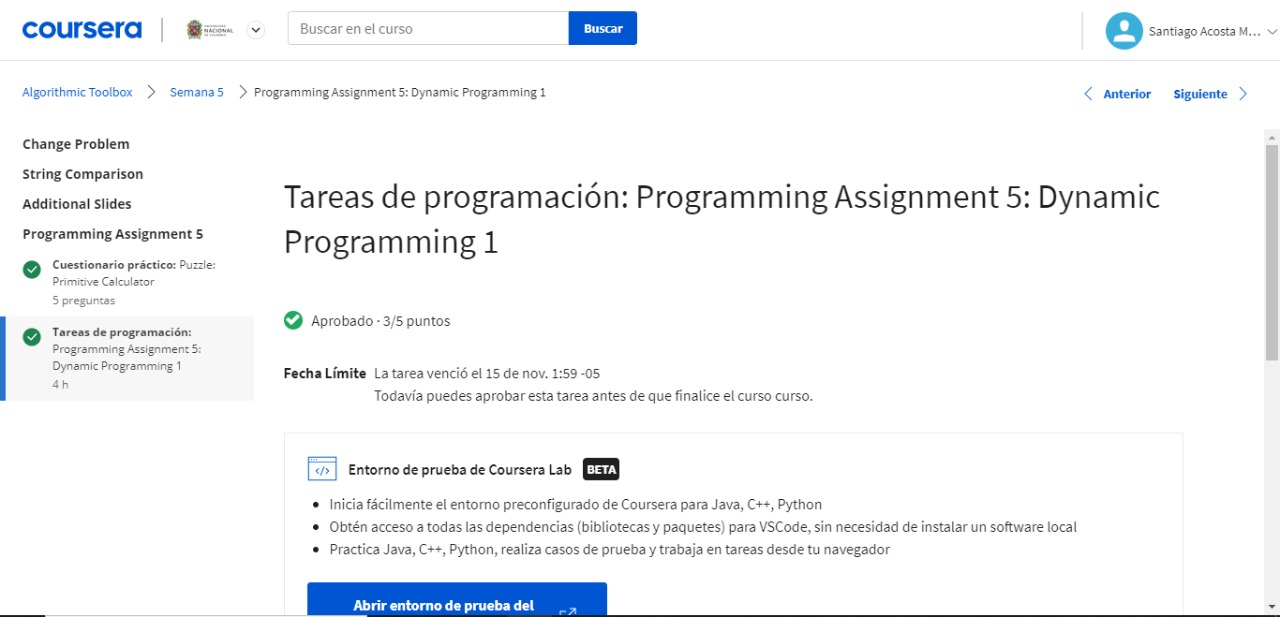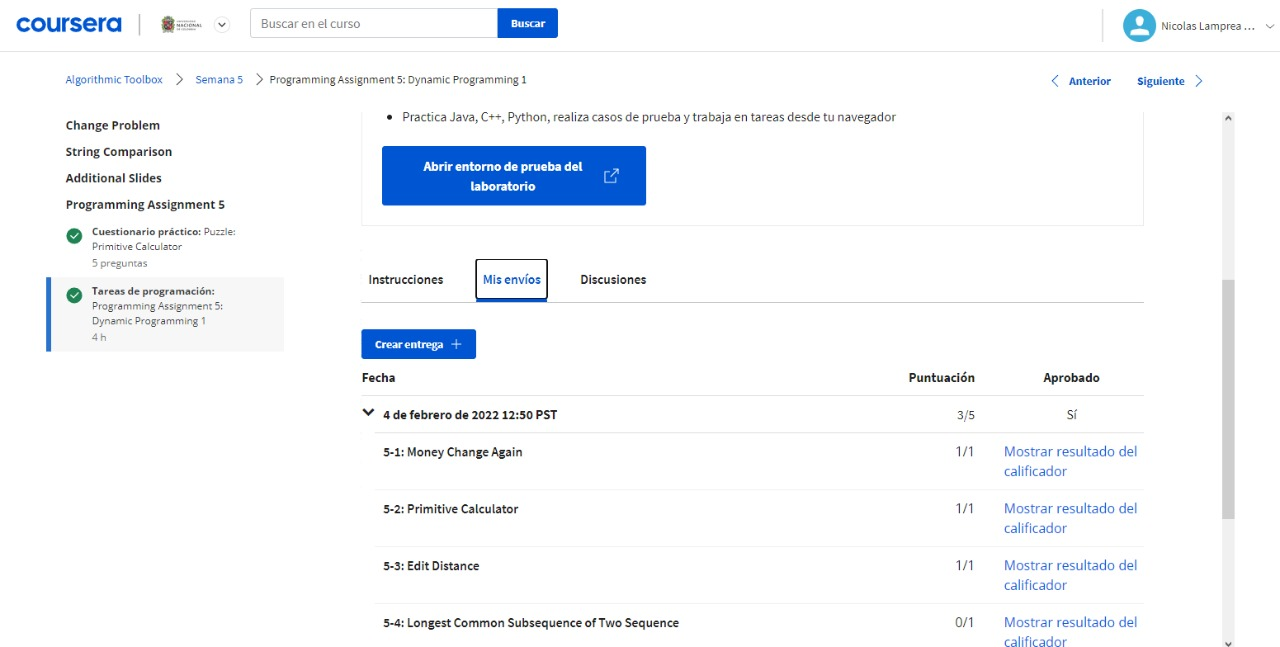